In [6]:
import pandas as pd

In [7]:
my_series = pd.Series([5, 6, 7, 8, 9, 10])

In [8]:
print(my_series)
print("---")
print(my_series.index)
print("---")
print(my_series.values)
my_series.values
print(my_series[2])

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64
---
RangeIndex(start=0, stop=6, step=1)
---
[ 5  6  7  8  9 10]
7


In [9]:
my_series2 = pd.Series([5, 6, 7, 8, 9, 10], index=['a', 'b', 'c', 'd', 'e', 'f'])

In [10]:
print(my_series2['a'])
print("---")
print(my_series2[['a', 'd', 'f']])
print("---")
my_series2[['a', 'b', 'e']] = -1
print(my_series2)

5
---
a     5
d     8
f    10
dtype: int64
---
a    -1
b    -1
c     7
d     8
e    -1
f    10
dtype: int64


In [11]:
my_series2[my_series2 > 0]

c     7
d     8
f    10
dtype: int64

In [12]:
my_series2[my_series2 > 0] ** 2

c     49
d     64
f    100
dtype: int64

In [13]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]
})
df

,country,population,square
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191
2,Belarus,9.50,207600
3,Ukraine,45.50,603628


In [14]:
df['country']

0    Kazakhstan
1        Russia
2       Belarus
3       Ukraine
Name: country, dtype: object

In [15]:
type(df['country'])

pandas.core.series.Series

In [16]:
df.columns

Index(['country', 'population', 'square'], dtype='object')

In [17]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [18]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]
}, index=['KZ', 'RU', 'BY', 'UA'])
df

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [19]:
df.index = ['KZ', 'RU', 'BY', 'UA']
df.index.name = 'Country Code'
df

,country,population,square
Country Code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [20]:
df['country']

Country Code
KZ    Kazakhstan
RU        Russia
BY       Belarus
UA       Ukraine
Name: country, dtype: object

In [21]:
df.loc['KZ']

country       Kazakhstan
population         17.04
square           2724902
Name: KZ, dtype: object

In [22]:
df.iloc[2]

country       Belarus
population        9.5
square         207600
Name: BY, dtype: object

In [23]:
df.loc[['KZ', 'RU'], 'population']

Country Code
KZ     17.04
RU    143.50
Name: population, dtype: float64

In [24]:
df.loc['KZ':'RU', :]

,country,population,square
Country Code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191


In [25]:
df[df.population > 10][['country', 'square']]

,country,square
Country Code,,
KZ,Kazakhstan,2724902
RU,Russia,17125191
UA,Ukraine,603628


In [26]:
df.reset_index()

,Country Code,country,population,square
0,KZ,Kazakhstan,17.04,2724902
1,RU,Russia,143.50,17125191
2,BY,Belarus,9.50,207600
3,UA,Ukraine,45.50,603628


In [27]:
df['density'] = df['population'] / df['square'] * 1000000
df

,country,population,square,density
Country Code,,,,
KZ,Kazakhstan,17.04,2724902,6.253436
RU,Russia,143.50,17125191,8.379469
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


In [28]:
df.drop(['density'], axis='columns')

,country,population,square
Country Code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [29]:
df = df.rename(columns={'Country Code': 'country_code'})
df


,country,population,square,density
Country Code,,,,
KZ,Kazakhstan,17.04,2724902,6.253436
RU,Russia,143.50,17125191,8.379469
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


In [30]:
df = df.reset_index()
df = df.rename(columns={'Country Code': 'country_code'})
df

,country_code,country,population,square,density
0,KZ,Kazakhstan,17.04,2724902,6.253436
1,RU,Russia,143.50,17125191,8.379469
2,BY,Belarus,9.50,207600,45.761079
3,UA,Ukraine,45.50,603628,75.377550


In [31]:
df.to_csv('test.csv')

In [33]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [35]:
print(titanic_df.groupby(['Sex', 'Survived'])['PassengerID'].count())

Sex     Survived
female  0           154
        1           308
male    0           709
        1           142
Name: PassengerID, dtype: int64


In [36]:
print(titanic_df.groupby(['PClass', 'Survived'])['PassengerID'].count())

PClass  Survived
*       0             1
1st     0           129
        1           193
2nd     0           160
        1           119
3rd     0           573
        1           138
Name: PassengerID, dtype: int64


In [37]:
pvt = titanic_df.pivot_table(index=['Sex'], columns=['PClass'], values='Name', aggfunc='count')

In [40]:
print(pvt)
print(pvt.loc['female', ['1st', '2nd', '3rd']])

PClass    *    1st    2nd    3rd
Sex                             
female  NaN  143.0  107.0  212.0
male    1.0  179.0  172.0  499.0
PClass
1st    143.0
2nd    107.0
3rd    212.0
Name: female, dtype: float64


In [43]:
df = pd.read_csv('apple.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-02-22,136.429993,137.119995,136.110001,137.110001,20745300,137.110001
2017-02-21,136.229996,136.750000,135.979996,136.699997,24265100,136.699997
2017-02-17,135.100006,135.830002,135.100006,135.720001,22084500,135.720001
2017-02-16,135.669998,135.899994,134.839996,135.350006,22118000,135.350006
2017-02-15,135.520004,136.270004,134.619995,135.509995,35501600,135.509995


In [45]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-02-23,515.079987,517.830009,509.499992,516.389977,142006900,66.903253
2012-02-24,519.669998,522.899979,518.640015,522.409981,103768000,67.683203
2012-02-27,521.309982,528.500000,516.280014,525.760017,136895500,68.117232
2012-02-28,527.960014,535.410011,525.850006,535.410011,150096800,69.367481
2012-02-29,541.560005,547.610023,535.700005,542.440025,238002800,70.278286


In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-02-23 to 2017-02-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   int64  
 5   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB
None


In [50]:
df.loc['2012-Feb':'2015-Feb', 'Close'].mean()

430.4396831701847

In [51]:
import matplotlib.pyplot as plt


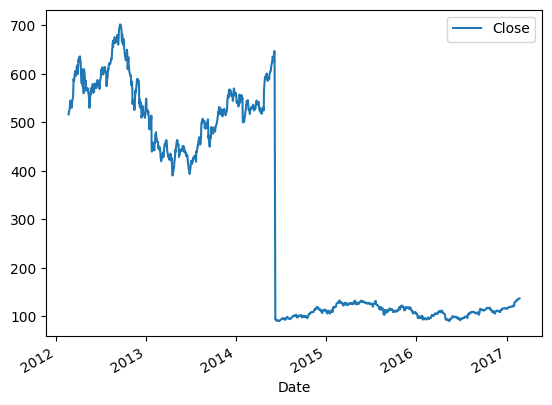

In [59]:
new_sample_df = df.loc['2012-Feb':'2017-Feb', ['Close']]
new_sample_df.plot()
plt.show()